#    데이터 준비
파이토치에서는 데이터 준비를 위해 torch.utils.data의 Dataset과 DataLoader 사용 가능
*    Dataset에는 다양한 데이터 셋이 존재(MNIST, FashionMNIST,CIFAR10 ...)

  *   Vision Dataset : http://pytorch.org/vision/stable/datasets.html
  *   Text Dataset : http://pytorch.org/text/stable/datasets.html
  *   Audio Dataset : http://pytorch.org/audio/stable/datasets.html

*    DataLoader와 Dataset을 통해 batch_size, train 여부, transform 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해 줄 수 있음


In [235]:
from torch.utils.data import Dataset, DataLoader

In [236]:
import torch

토치비전(torchvision)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지


*   transforms : 전처리 할 때 사용하는 메소드(http://pytorch.org/docs/stable/torchvision/transforms.html)
*   transforms에서 제공하는 클래스이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행



In [237]:
import torchvision.transforms as transforms
from torchvision import datasets

DataLoder의 인자로 들어갈 transform을 미리 정의할 수 있고, Compose를 통해 리스트 안에 순서대로 전처리 진행
ToTensor()를 하는 이유는 torchvision이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [238]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,),std=(1.0,))]) # 평균 0.5, 표준편차 1로 노말라이제이션해줘

In [239]:
trainset = datasets.MNIST(root='/content/',
                          train=True,download=True,
                          transform=mnist_transform)
testset = datasets.MNIST(root='/content/',
                          train=False,download=True,
                          transform=mnist_transform)

DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기 만큼 데이터를 가져옴

In [240]:
train_loader = DataLoader(trainset, batch_size=8,shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8,shuffle=True, num_workers=2)

In [241]:
dataiter = iter(train_loader)
images, labels =next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [242]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

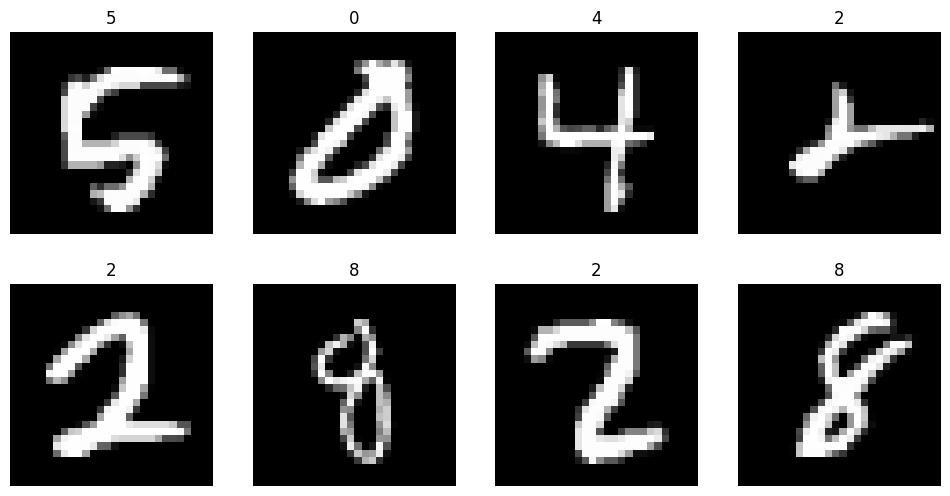

In [243]:
import matplotlib.pyplot as plt

figure= plt.figure(figsize=(12,6))
cols, rows = 4,2
for i in range(1, cols * rows + 1) :
  sample_idx = torch.randint(len(trainset), size=(1,)).item()

  img, label = trainset[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(),cmap='gray')
plt.show()

In [244]:
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [245]:
import torch.nn as nn
# 2. 모델 구성
layer= nn.Conv2d(1,64,5,1).to(torch.device('cpu'))

In [246]:
input_data = torch.unsqueeze(images[0],dim=0)
print(input_data.size())
# torch.Size([1, 1, 28, 28]) => 흑백 사진 한 장
# [배치사이즈, 채널, 너비,높이]
output_data = layer(input_data)
output = output_data.data
'''
.data 속성은 텐서의 데이터에 직접 접근하는 데 사용되며, 기울기 계산과는 관련이 없습니다.
그러나 이 방법은 최신 버전의 PyTorch에서 권장되지 않습니다.
대신 .detach() 메서드를 사용하여 동일한 결과를 얻을 수 있습니다.
'''
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 64, 24, 24)

In [247]:
weight = layer.weight
weight = weight.detach()
weight = weight.numpy()
'''
위의 오류 메시지는 nn.Sequential 객체에서 직접적으로
'weight' 속성을 가져오려고 했기 때문에 발생했습니다.
nn.Sequential 객체는 여러 레이어를 담는 컨테이너이므로
각 레이어의 속성을 직접 가져올 수 없습니다.

레이어 내의 weight를 가져오려면, 먼저 해당 레이어를 참조해야 합니다.
예를 들어, 첫 번째 레이어의 weight를 가져오려면 다음과 같이 할 수 있습니다:

weight = layer[0].weight

그러나, 여기서 중요한 것은 layer[0]이 실제로 Conv2d와 같은 가중치를 갖는 레이어인지 확인하는 것입니다.
위의 코드를 참고하여, 원하는 레이어의 가중치를 추출하는 방법을 사용해보세요.
'''
weight.shape

(64, 1, 5, 5)

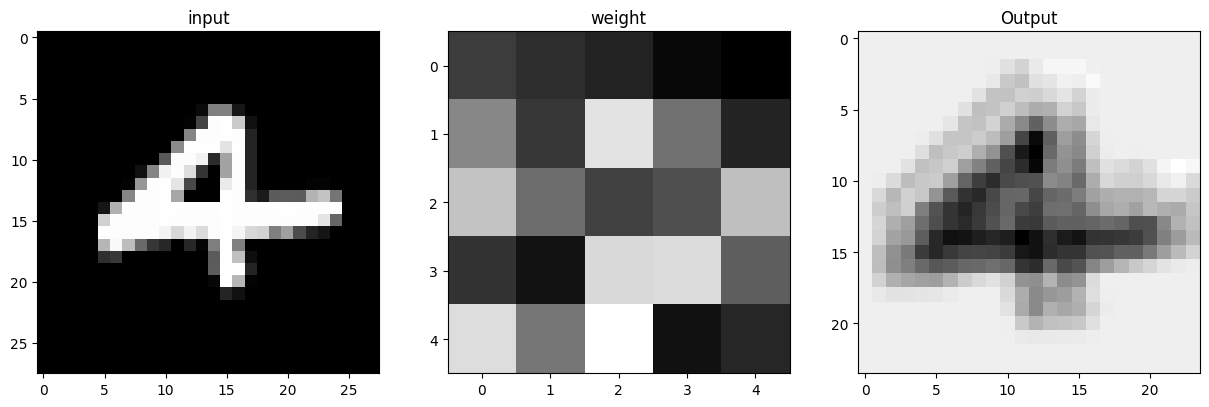

In [249]:
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title("input")
plt.imshow(input_image,'gray')

plt.subplot(132)
plt.title('weight')
plt.imshow(weight[0,0,:,:],'gray')

plt.subplot(133)
# 1: 전체 행의 수 (1행)
# 3: 전체 열의 수 (3열)
# 3: 현재 그림의 위치 (3번째)
plt.title('Output')
plt.imshow(output_arr[0,0,:,:],'gray')
plt.show()